In [34]:
from sklearn.datasets import load_iris
import numpy as ny
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
#%matplotlib inline

In [35]:
iris = load_iris()
data = iris["data"][:,:2]
labels = iris["target"]
#data

In [36]:
N, M = data.shape
print(N, M)

150 2


In [37]:
Y = labels.reshape((N, 1))
Y = ny.array(Y==2).astype(int)
Y.shape

(150, 1)

In [38]:
X = MinMaxScaler().fit_transform(data)

In [39]:
X = X.T

In [40]:
bias = ny.ones((1, N))

In [41]:
XB = ny.vstack((bias, X))

In [42]:
class LogisitcRegression:
    def __init__(self, alpha, gens):
        self.alpha = alpha
        self.gens = gens
    def sigmoid(self, x):
        return 1.0/(1+ny.exp(-x))
    def prediction(self):
        return self.sigmoid(self.weights.T.dot(self.X).T)
    def calculatePenalty(self):
        self.H = self.prediction()
        component1 = ny.sum(self.y*ny.log(self.H))
        component2 = ny.sum((1-self.y)*ny.log(1-self.H))
        return -ny.sum(component1 + component2)/self.N
    def updateWeights(self):
        nabla = self.alpha*((self.y - self.H).T.dot(self.X.T).T)
        #print(nabla)
        self.weights += nabla
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.M, self.N = X.shape
        self.weights = ny.zeros((self.M, 1))
        #self.H = self.predict()
        #print(H)  
        #J = self.calculatePenalty()
        #print(J)
        #self.updateWeights()
        #print(self.weights)
        self.buffer = []
        for g in ny.arange(self.gens):
            self.buffer.append(self.calculatePenalty())
            #print(self.calculatePenalty())
            self.updateWeights()   
            #print(self.weights)
    def plotErrorCurve(self):
        plt.plot(ny.array(self.buffer))
    def predict(self, t):
        return self.weights.T.dot(t)>=0.5
    def getWeights(self):
        return self.weights

In [43]:
clf = LogisitcRegression(alpha=0.001, gens=5000)

In [44]:
clf.fit(XB, Y)

In [45]:
clf.plotErrorCurve()

In [46]:
predictions = []
for i in ny.arange(XB.shape[1]):
    predictions.append(clf.predict(XB[:,i]))

In [47]:
print(ny.array(predictions).flatten().astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 0 0]


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
score = accuracy_score(Y, predictions)

In [50]:
print(score)

0.753333333333


In [51]:
X = X.T

In [52]:
#print(X.shape)
ax1_min, ax1_max = X[:,0].min(), X[:,0].max()
ax = ny.linspace(ax1_min, ax1_max, 50)
print(ax)

[ 0.          0.02040816  0.04081633  0.06122449  0.08163265  0.10204082
  0.12244898  0.14285714  0.16326531  0.18367347  0.20408163  0.2244898
  0.24489796  0.26530612  0.28571429  0.30612245  0.32653061  0.34693878
  0.36734694  0.3877551   0.40816327  0.42857143  0.44897959  0.46938776
  0.48979592  0.51020408  0.53061224  0.55102041  0.57142857  0.59183673
  0.6122449   0.63265306  0.65306122  0.67346939  0.69387755  0.71428571
  0.73469388  0.75510204  0.7755102   0.79591837  0.81632653  0.83673469
  0.85714286  0.87755102  0.89795918  0.91836735  0.93877551  0.95918367
  0.97959184  1.        ]


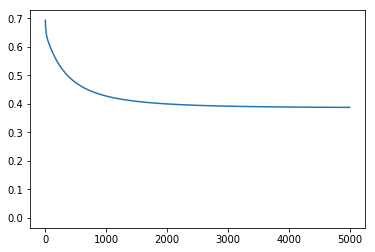

In [53]:
markers = ['*','^']
colours = ['red', 'black']
#for i in ny.arange(len(markers)):
    #plt.scatter(X[Y[:,0]==i, 0], X[Y[:,0]==i,1], marker=markers[i])
W = clf.getWeights()
line_vals = ny.zeros((50, 1))
plt.plot(ax, line_vals,'k', linewidth=2)
plt.show()    

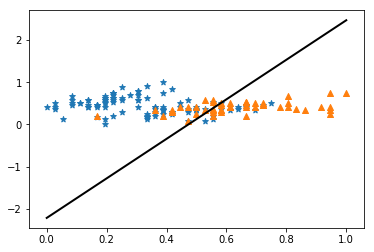

In [54]:
markers = ['*','^']
colours = ['red', 'black']
for i in ny.arange(len(markers)):
    plt.scatter(X[Y[:,0]==i, 0], X[Y[:,0]==i,1], marker=markers[i])
W = clf.getWeights()
line_vals = -(W[0,0]+W[1,0]*ax)/W[2,0]
plt.plot(ax, line_vals,'k', linewidth=2)
plt.show()    